<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.538562,38.099979,97.544023,-0.348274,188.834290,189.212241,-0.377950
1,0.0,1.0,24.063620,47.299366,54.085226,0.302745,135.750957,135.475825,0.275131
2,0.0,2.0,24.955581,45.440507,41.579793,-0.278751,121.697130,121.993287,-0.296156
3,0.0,3.0,49.888441,27.699777,30.501107,0.255181,118.344506,118.062176,0.282330
4,0.0,4.0,83.468793,33.892261,90.322164,-0.095137,217.588080,217.656881,-0.068801
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.974808,99.972396,95.841564,-0.170669,258.618099,258.799361,-0.181262
249996,999.0,246.0,81.750225,94.007773,62.382185,-0.005404,248.134779,248.129152,0.005627
249997,999.0,247.0,81.575403,48.005217,82.761778,0.209274,222.551672,222.343211,0.208460
249998,999.0,248.0,59.861514,22.495142,86.281822,-0.301898,178.336581,178.640358,-0.303777


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.538562,38.099979,97.544023,-0.348274,188.834290,189.212241,-0.377950
1,0.0,1.0,24.063620,47.299366,54.085226,0.302745,135.750957,135.475825,0.275131
2,0.0,2.0,24.955581,45.440507,41.579793,-0.278751,121.697130,121.993287,-0.296156
3,0.0,3.0,49.888441,27.699777,30.501107,0.255181,118.344506,118.062176,0.282330
4,0.0,4.0,83.468793,33.892261,90.322164,-0.095137,217.588080,217.656881,-0.068801
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.974808,99.972396,95.841564,-0.170669,258.618099,258.799361,-0.181262
249996,999.0,246.0,81.750225,94.007773,62.382185,-0.005404,248.134779,248.129152,0.005627
249997,999.0,247.0,81.575403,48.005217,82.761778,0.209274,222.551672,222.343211,0.208460
249998,999.0,248.0,59.861514,22.495142,86.281822,-0.301898,178.336581,178.640358,-0.303777


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.538562  38.099979  97.544023  ...  188.834290  189.212241 -0.377950
      1.0    24.063620  47.299366  54.085226  ...  135.750957  135.475825  0.275131
      2.0    24.955581  45.440507  41.579793  ...  121.697130  121.993287 -0.296156
      3.0    49.888441  27.699777  30.501107  ...  118.344506  118.062176  0.282330
      4.0    83.468793  33.892261  90.322164  ...  217.588080  217.656881 -0.068801
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  52.974808  99.972396  95.841564  ...  258.618099  258.799361 -0.181262
      246.0  81.750225  94.007773  62.382185  ...  248.134779  248.129152  0.005627
      247.0  81.575403  48.005217  82.761778  ...  222.551672  222.343211  0.208460
      248.0  59.861514  22.495142  86.281822  ...  178.336581  178.640358 -0.303777
      249.0  72.425313  67.985534  38.552480  ...  188.663129  188.935625 -0.272497

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.538562  38.099979  97.544023  ...  188.834290  189.212241 -0.377950
      1.0    24.063620  47.299366  54.085226  ...  135.750957  135.475825  0.275131
      2.0    24.955581  45.440507  41.579793  ...  121.697130  121.993287 -0.296156
      3.0    49.888441  27.699777  30.501107  ...  118.344506  118.062176  0.282330
      4.0    83.468793  33.892261  90.322164  ...  217.588080  217.656881 -0.068801
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  52.974808  99.972396  95.841564  ...  258.618099  258.799361 -0.181262
      246.0  81.750225  94.007773  62.382185  ...  248.134779  248.129152  0.005627
      247.0  81.575403  48.005217  82.761778  ...  222.551672  222.343211  0.208460
      248.0  59.861514  22.495142  86.281822  ...  178.336581  178.640358 -0.303777
      249.0  72.425313  67.985534  38.552480  ...  188.663129  188.935625 -0.272497

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.538562,38.099979,97.544023,-0.348274,188.834290,189.212241,-0.377950
1,0.0,1.0,24.063620,47.299366,54.085226,0.302745,135.750957,135.475825,0.275131
2,0.0,2.0,24.955581,45.440507,41.579793,-0.278751,121.697130,121.993287,-0.296156
3,0.0,3.0,49.888441,27.699777,30.501107,0.255181,118.344506,118.062176,0.282330
4,0.0,4.0,83.468793,33.892261,90.322164,-0.095137,217.588080,217.656881,-0.068801
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.974808,99.972396,95.841564,-0.170669,258.618099,258.799361,-0.181262
249996,999.0,246.0,81.750225,94.007773,62.382185,-0.005404,248.134779,248.129152,0.005627
249997,999.0,247.0,81.575403,48.005217,82.761778,0.209274,222.551672,222.343211,0.208460
249998,999.0,248.0,59.861514,22.495142,86.281822,-0.301898,178.336581,178.640358,-0.303777


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.538562  38.099979  97.544023  ...  188.834290  189.212241 -0.377950
      1.0    24.063620  47.299366  54.085226  ...  135.750957  135.475825  0.275131
      2.0    24.955581  45.440507  41.579793  ...  121.697130  121.993287 -0.296156
      3.0    49.888441  27.699777  30.501107  ...  118.344506  118.062176  0.282330
      4.0    83.468793  33.892261  90.322164  ...  217.588080  217.656881 -0.068801
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  52.974808  99.972396  95.841564  ...  258.618099  258.799361 -0.181262
      246.0  81.750225  94.007773  62.382185  ...  248.134779  248.129152  0.005627
      247.0  81.575403  48.005217  82.761778  ...  222.551672  222.343211  0.208460
      248.0  59.861514  22.495142  86.281822  ...  178.336581  178.640358 -0.303777
      249.0  72.425313  67.985534  38.552480  ...  188.663129  188.935625 -0.272497

[250000 rows x 7 columns]

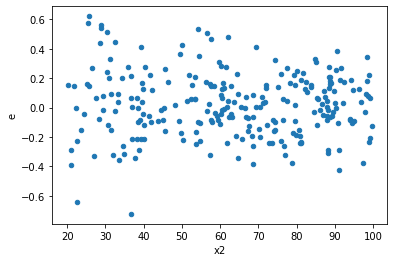

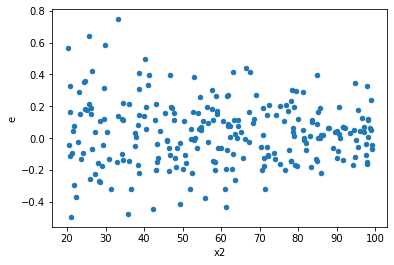

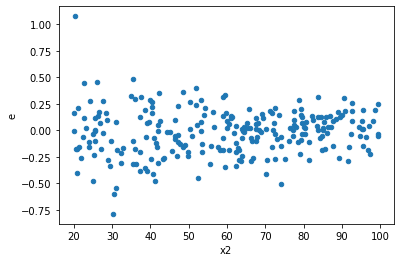

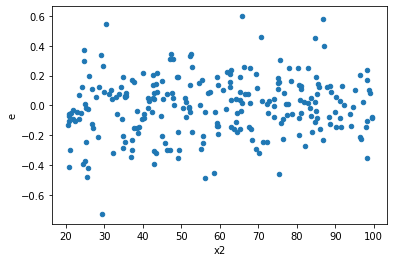

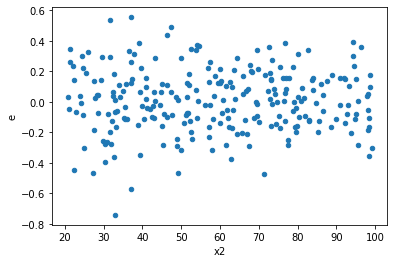

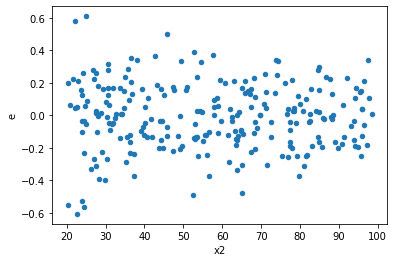

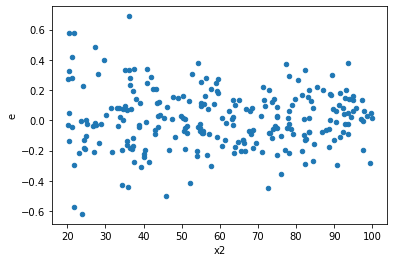

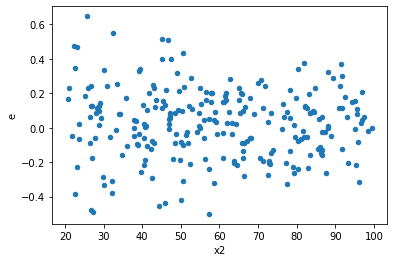

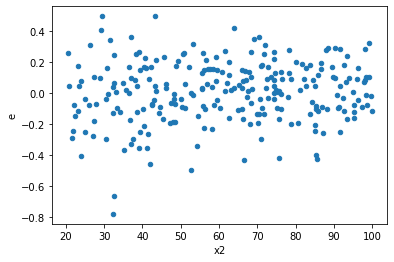

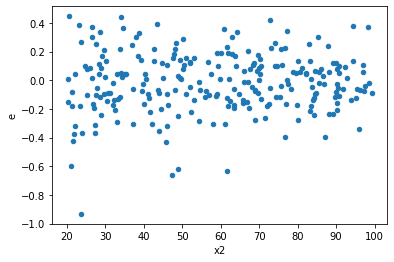

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,3.151578301439318,4.929803735655156,0.0328289406399929,0.05135212224640787,0.6392908258487663,0.028636150622271553,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,2.734068270881165,6.118278786847314,0.028479877821678806,0.06373207069632618,0.4468688606930909,9.42673538542481e-05,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,2.8288092071535136,5.47605393365907,0.029466762574515765,0.05704222847561532,0.5165780398483618,0.0013015285428211673,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,2.799673137233127,6.527190071178842,0.029163261846178404,0.06799156324144627,0.42892471441811286,4.164735457397535e-05,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,2.862461305133768,4.767870398551646,0.029817305261810086,0.049665316651579645,0.6003647469115999,0.012677468874507073,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,2.787192243315275,4.685384717500643,0.029033252534534117,0.04880609080729836,0.5948694528551044,0.011176198241265208,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,2.6325845788097784,4.292315506215666,0.027422756029268525,0.04471161985641319,0.613325039829331,0.01687616190477298,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,3.108079533599176,6.090309512584236,0.03237582847499142,0.06344072408941913,0.5103319506466852,0.0010610990870193221,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,3.1730972970213935,4.896413132941939,0.03305309684397285,0.0510043034681452,0.6480452549384622,0.033800093975478764,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    933
Reject005=1 : Homoscedasticity       67
Name: Result_test, dtype: int64